<a href="https://colab.research.google.com/github/KimJunGu9/6.DL/blob/main/13_%EB%8B%A4%EC%A4%91_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
공부한 시간             2  2  2  3  4  4
학원에서 공부한 시간    0  1  2  1  1  2
과외로 공부한 시간      0  0  1  1  2  2
점수                   50 60 65 70 75 85

일반 선형 회귀: H = Wx + b
다중 선형 회귀: H = W1x1 + W2x2 + W3x3 + b
'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
x1_train = torch.FloatTensor([[2], [2], [2], [3], [4], [4]])
x2_train = torch.FloatTensor([[0], [1], [1], [1], [1], [2]])
x3_train = torch.FloatTensor([[0], [0], [1], [1], [2], [2]])
y_train = torch.FloatTensor([[50], [60], [65], [70], [75], [85]])

In [ ]:
W1 = torch.zeros(1, requires_grad=True) # 기울기, 절편값을 저장할 수 있게 하나씩 생성
W2 = torch.zeros(1, requires_grad=True)
W3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
optimizer = optim.SGD([W1, W2, W3, b], lr=1e-5) # 기울기가 3개 (W1, W2, W3)  # 러닝메이트 : 1e-5
tot_epochs = 100000    # 하나의 선을 긋는 것보다 여러개의 기울기를 구하는게 훨씬 계산 양도 많고 촘촘해야되기때문에,  lr을 굉장히 작게 주고 업데이트를 많이 하기위해 십만을 넣음.
# lr과 에폭은 본인이 계속 학습을 시켜보면서 맞춰봐야되는 내용이기 때문에 정답이 없음

for epoch in range(1, tot_epochs+1):
    H = x1_train*W1 + x2_train*W2 + x3_train*W3 + b # 기울기 첫번째 + 두번째 + 세번째 + 절편
    cost = torch.mean((H - y_train) ** 2)

    optimizer.zero_grad() # 초기화 시켜주고,
    cost.backward() # backward에서 계산해주고,
    optimizer.step() # optimizer에서 업데이트 시켜줌

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} W1:{:.3f} W2:{:.3f} W3:{:.3f} b:{:.3f} Cost:{:.6f}'.format(epoch, tot_epochs, \
            W1.item(), W2.item(), W3.item(), b.item(), cost.item()))

Epoch 1000/100000 W1:16.746 W2:6.776 W3:-0.483 b:11.386 Cost:68.533638
Epoch 2000/100000 W1:16.746 W2:6.786 W3:-0.531 b:11.434 Cost:68.069199
Epoch 3000/100000 W1:16.746 W2:6.797 W3:-0.578 b:11.481 Cost:67.612587
Epoch 4000/100000 W1:16.746 W2:6.807 W3:-0.625 b:11.528 Cost:67.161232
Epoch 5000/100000 W1:16.746 W2:6.818 W3:-0.672 b:11.574 Cost:66.714043
Epoch 6000/100000 W1:16.746 W2:6.828 W3:-0.718 b:11.621 Cost:66.270943
Epoch 7000/100000 W1:16.746 W2:6.839 W3:-0.764 b:11.668 Cost:65.833038
Epoch 8000/100000 W1:16.746 W2:6.849 W3:-0.810 b:11.713 Cost:65.401825
Epoch 9000/100000 W1:16.746 W2:6.860 W3:-0.855 b:11.759 Cost:64.974419
Epoch 10000/100000 W1:16.746 W2:6.871 W3:-0.900 b:11.805 Cost:64.550751
Epoch 11000/100000 W1:16.746 W2:6.882 W3:-0.945 b:11.851 Cost:64.131508
Epoch 12000/100000 W1:16.746 W2:6.893 W3:-0.990 b:11.895 Cost:63.719669
Epoch 13000/100000 W1:16.746 W2:6.903 W3:-1.034 b:11.940 Cost:63.311783
Epoch 14000/100000 W1:16.746 W2:6.914 W3:-1.078 b:11.985 Cost:62.907547
E

In [ ]:
x_train = torch.FloatTensor([[2, 0, 0], [2, 1, 0], [2, 1, 1], [3, 1, 1], [4, 1, 2], [4, 2, 2]])  # 2차원으로 저장
y_train = torch.FloatTensor([[50], [60], [65], [70], [75], [85]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 3])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((3, 1), requires_grad=True) # 3 : W1, W2, W3 -> 총 3개
b = torch.zeros(1, requires_grad=True) # bias 는 1개니까 1

optimizer = optim.SGD([W, b], lr=1e-5)

tot_epochs = 100000

# x_train: torch.Size([6, 3])
# W: torch.Size([3, 1])
# ([6, 3])([3, 1])

for epoch in range(1, tot_epochs+1):

    H = x_train.matmul(W) + b            # x_train.matmul(W) = x1_train*W1 + x2_train*W2 + x3_train*W3
    cost = torch.mean((H - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} H:{} Cost:{:.6f}'.format(epoch, tot_epochs, H.squeeze().detach(), cost.item()))

Epoch 1000/100000 H:tensor([ 8.2926,  9.5923, 10.9249, 14.4690, 19.3458, 20.6454]) Cost:2921.191650
Epoch 2000/100000 H:tensor([14.8040, 17.1219, 19.4771, 25.7972, 34.4724, 36.7903]) Cost:1845.028687
Epoch 3000/100000 H:tensor([19.9156, 23.0305, 26.1648, 34.6572, 46.2840, 49.3989]) Cost:1186.857300
Epoch 4000/100000 H:tensor([23.9327, 27.6720, 31.3951, 41.5881, 55.5042, 59.2435]) Cost:784.101379
Epoch 5000/100000 H:tensor([27.0942, 31.3227, 35.4861, 47.0108, 62.6989, 66.9274]) Cost:537.428406
Epoch 6000/100000 H:tensor([29.5866, 34.1988, 38.6866, 51.2545, 68.3103, 72.9225]) Cost:386.135498
Epoch 7000/100000 H:tensor([31.5559, 36.4693, 41.1909, 54.5767, 72.6840, 77.5975]) Cost:293.131592
Epoch 8000/100000 H:tensor([33.1161, 38.2663, 43.1511, 57.1784, 76.0905, 81.2406]) Cost:235.752075
Epoch 9000/100000 H:tensor([34.3564, 39.6929, 44.6858, 59.2168, 78.7408, 84.0772]) Cost:200.147934
Epoch 10000/100000 H:tensor([35.3465, 40.8299, 45.8881, 60.8150, 80.8001, 86.2836]) Cost:177.856079
Epoch 

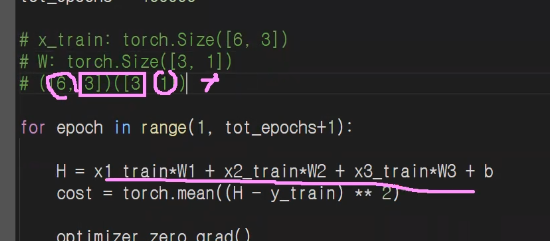

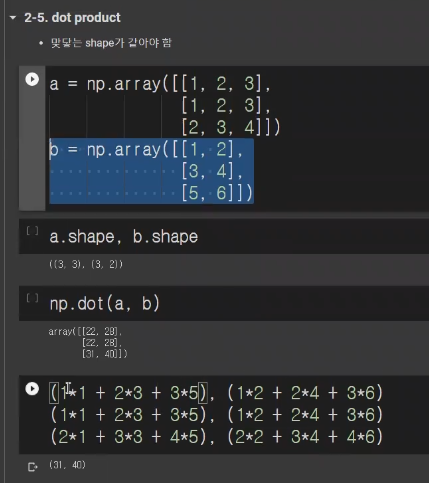

# 배치

* 전체 데이터를 작은 단위로 나눠서 해당 단위로 학습하는 개념
* 배치 학습을 하게되면 배치만큼만 가져가서 배치에 대한 비용(cost)를 계산하고 경사하강법을 수행
* 배치를 가져가서 경사하강법을 수행하고 마지막 배치까지 이를 반복
* 전체 데이터에 대한 학습이 모두 끝나면 1에폭이 끝나게 됨
* 배치크기(batch size)는 보통 2의 제곱수를 사용(CPU와 GPU의 메모리가 2의 배수이므로 배치 크기가 2의 제곱수일 경우 데이터의 송수신이 효율적임)
---
* 쉽게말해, 전체 데이터를 다 쓰는 것이 아니고 데이터의 양이 많다면 쪼개서 학습시키는 것이다.

In [ ]:
x_train = torch.FloatTensor([[2, 0, 0], [2, 1, 0], [2, 1, 1], [3, 1, 1], [4, 1, 2], [4, 2, 2]])
y_train = torch.FloatTensor([[50], [60], [65], [70], [75], [85]])

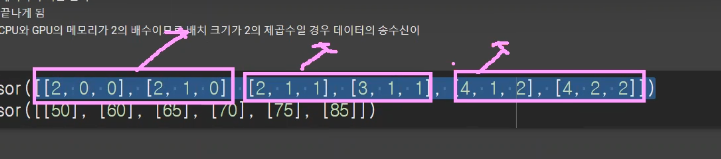

# 데이터로더

* 데이터를 좀 더 쉽게 다룰 수 있도록 데이터셋과 데이터로더를 파이토치 및 텐서플로우에서 제공
* 배치학습, 데이터셔플, 병렬처리 등을 간단하게 수행

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
# batch_size = 2: 각 minibatch의 크기(한 번에 배치 안에 있는 샘플 사이즈)
# shuffle = True: Epoch 마다 데이터셋을 섞어 데이터가 학습되는 순서를 바꿈, True를 권장
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# dataset에 x_train, y_train을 집어넣음
# 그리고 dataset을 dataloader에 집어넣음. 그리고 여기에서 batch_size를 결정함(2의 배수로 결정)

배치 사이즈 2개 만드는거

In [ ]:
model = nn.Linear(3, 1) # 3개를 입력받고, 1개를 출력하겠다.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
epoch_count = 5000
# len(dataloader): 한 epoch당 minibatch 개수

for epoch in range(epoch_count + 1):
    for batch_idx, datas in enumerate(dataloader):  # datas에 x_train, y_train값이 다 들어가 있으므로 뽑아서 계산  # dataloader에는 인덱스랑 데이터 값이 다 들어가 있음
        x_train, y_train = datas # datas에 있는 데이터 한 줄을 가져와서 x_train에는 x_train을, y_train에 y_train을 분할해준다.
        H = model(x_train)
        cost = F.mse_loss(H, y_train) # 오차값을 뽑아냄

        optimizer.zero_grad() # 옵티마이저를 초기화시켜주고
        cost.backward() # 기울기를 계산해주고
        optimizer.step() # 값을 변경시켜줌

        print('Epoch:{:4d}/{} Batch:{}/{} Cost:{:.6f}'.format(epoch, epoch_count, batch_idx+1, len(dataloader), cost.item()))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch:3334/5000 Batch:2/3 Cost:185.727463
Epoch:3334/5000 Batch:3/3 Cost:301.601410
Epoch:3335/5000 Batch:1/3 Cost:129.076706
Epoch:3335/5000 Batch:2/3 Cost:185.673737
Epoch:3335/5000 Batch:3/3 Cost:232.387115
Epoch:3336/5000 Batch:1/3 Cost:185.619949
Epoch:3336/5000 Batch:2/3 Cost:301.404602
Epoch:3336/5000 Batch:3/3 Cost:59.946503
Epoch:3337/5000 Batch:1/3 Cost:373.032471
Epoch:3337/5000 Batch:2/3 Cost:129.052963
Epoch:3337/5000 Batch:3/3 Cost:44.730247
Epoch:3338/5000 Batch:1/3 Cost:204.292831
Epoch:3338/5000 Batch:2/3 Cost:185.501953
Epoch:3338/5000 Batch:3/3 Cost:156.838837
Epoch:3339/5000 Batch:1/3 Cost:204.264008
Epoch:3339/5000 Batch:2/3 Cost:156.784302
Epoch:3339/5000 Batch:3/3 Cost:185.420303
Epoch:3340/5000 Batch:1/3 Cost:200.661240
Epoch:3340/5000 Batch:2/3 Cost:156.701599
Epoch:3340/5000 Batch:3/3 Cost:188.939407
Epoch:3341/5000 Batch:1/3 Cost:156.634796
Epoch:3341/5000 Batch:2/3 Cost:204.193588
Epoch:3341/5000 Batch:3/3 Cost:185.311096


In [ ]:
val = torch.FloatTensor([[5, 2, 3]]) # x1_train : 5, x2_train : 2, x3_train : 3
pred = model(val)
print('학습 후 입력이 5, 2, 3 일 때 예측값: ', pred)

학습 후 입력이 5, 2, 3 일 때 예측값:  tensor([[112.9258]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters())) # 기울기와 절편을 확인해보면, 기울기는 15.9010,  6.0221,  5.1388, 절편은 5.9602

[Parameter containing:
tensor([[15.9010,  6.0221,  5.1388]], requires_grad=True), Parameter containing:
tensor([5.9602], requires_grad=True)]
